# Importation des packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Etude du jeu de données

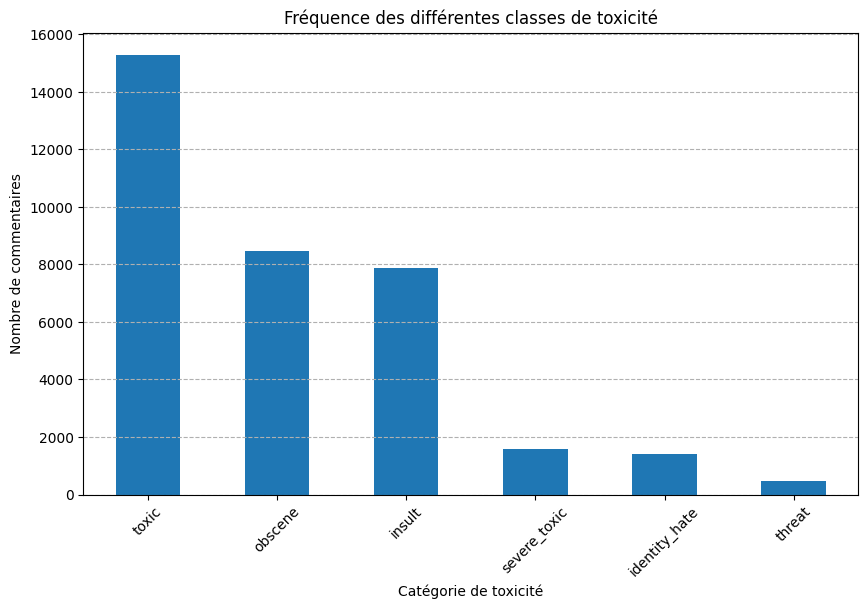

In [ ]:
# Calcul des fréquences pour chaque catégorie de toxicité
frequences_classes = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().sort_values(ascending=False)

# Création d'un histogramme pour visualiser les fréquences des classes de toxicité
plt.figure(figsize=(10, 6))
frequences_classes.plot(kind='bar')
plt.title('Fréquence des différentes classes de toxicité')
plt.xlabel('Catégorie de toxicité')
plt.ylabel('Nombre de commentaires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

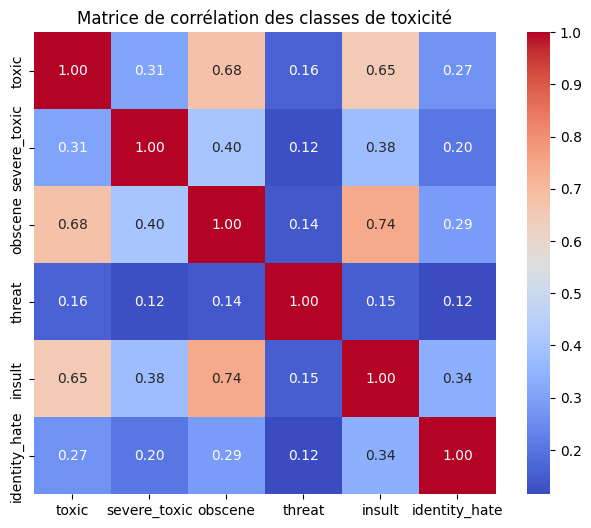

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matrice de corrélation des classes de toxicité')
plt.show()

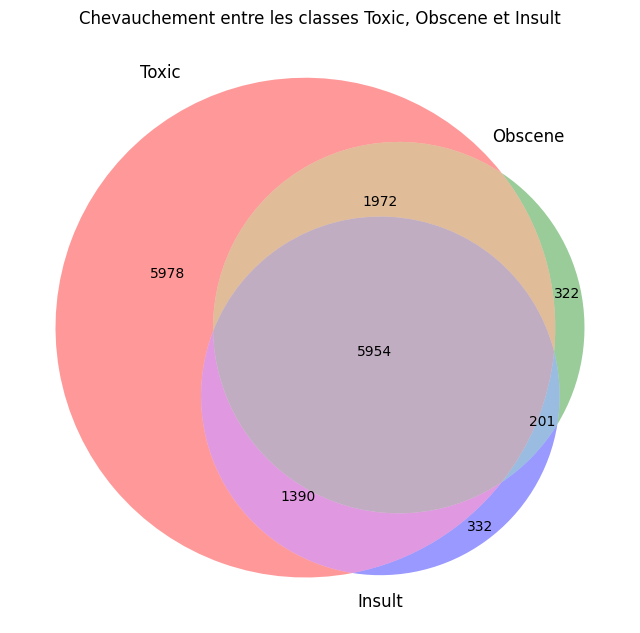

In [ ]:
from matplotlib_venn import venn2, venn3

# Exemple de visualisation d'un chevauchement entre 'toxic', 'obscene' et 'insult'
# Pour cela, nous convertissons les colonnes en ensembles de lignes où chaque classe est marquée comme 1
set_toxic = set(data[data['toxic'] == 1].index)
set_obscene = set(data[data['obscene'] == 1].index)
set_insult = set(data[data['insult'] == 1].index)

# Création du diagramme de Venn pour 3 ensembles
plt.figure(figsize=(8, 8))
venn3([set_toxic, set_obscene, set_insult], ('Toxic', 'Obscene', 'Insult'))
plt.title('Chevauchement entre les classes Toxic, Obscene et Insult')
plt.show()

In [ ]:
# Calculer la longueur de chaque commentaire
data['comment_length'] = data['comment_text'].apply(len)

# Calculer la longueur moyenne des commentaires par catégorie de toxicité
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for category in categories:
    mean_length = data.loc[data[category] == 1, 'comment_length'].mean()
    print(f"Longueur moyenne des commentaires pour {category}: {mean_length:.2f}")

Longueur moyenne des commentaires pour toxic: 295.25
Longueur moyenne des commentaires pour severe_toxic: 453.64
Longueur moyenne des commentaires pour obscene: 286.78
Longueur moyenne des commentaires pour threat: 307.74
Longueur moyenne des commentaires pour insult: 277.28
Longueur moyenne des commentaires pour identity_hate: 308.54


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import re
from collections import Counter

# Définir l'ensemble des mots vides
stop_words = set(stopwords.words('english'))

def nettoyer_texte(texte):
    # Supprimer la ponctuation et les nombres, mettre en minuscule
    texte = re.sub(r'[^a-zA-Z\s]', '', texte, re.I|re.A)
    texte = texte.lower()
    texte = texte.strip()
    # Tokenisation simple par espaces et suppression des mots vides
    mots = [mot for mot in texte.split() if mot not in stop_words]
    return mots

# Compteur pour chaque catégorie
for category in categories:
    # Filtrer les commentaires pour chaque catégorie
    commentaires = data.loc[data[category] == 1, 'comment_text']
    tous_mots = []

    # Nettoyer et extraire les mots de chaque commentaire
    for commentaire in commentaires:
        mots = nettoyer_texte(commentaire)
        tous_mots.extend(mots)

    # Compter et afficher les mots les plus fréquents
    compteur_mots = Counter(tous_mots)
    mots_frequents = compteur_mots.most_common(10)  # ajuster selon le besoin
    print(f"Mots les plus fréquents pour {category}: {mots_frequents}")

Mots les plus fréquents pour toxic: [('fuck', 8616), ('dont', 3555), ('shit', 3485), ('like', 3476), ('nigger', 3289), ('fucking', 3194), ('wikipedia', 3140), ('suck', 2986), ('go', 2834), ('hate', 2614)]
Mots les plus fréquents pour severe_toxic: [('fuck', 6048), ('suck', 2291), ('shit', 1878), ('faggot', 1570), ('ass', 1402), ('u', 1383), ('fucking', 1374), ('go', 1240), ('die', 1020), ('nigger', 1011)]
Mots les plus fréquents pour obscene: [('fuck', 8541), ('shit', 3100), ('fucking', 3098), ('suck', 2773), ('nigger', 2721), ('go', 2118), ('ass', 2094), ('u', 2047), ('dont', 1759), ('like', 1528)]
Mots les plus fréquents pour threat: [('die', 1030), ('kill', 504), ('ass.', 425), ('ass', 344), ('going', 294), ('block', 170), ('must', 166), ('jim', 158), ('wales', 157), ('supertrll', 150)]
Mots les plus fréquents pour insult: [('fuck', 6624), ('nigger', 2774), ('fucking', 2712), ('suck', 2546), ('go', 2210), ('u', 1950), ('fat', 1924), ('faggot', 1805), ('dont', 1622), ('shit', 1582)]


# Préparation des données

In [ ]:
# Your Code

# Entraînement du modèle baseline

In [ ]:
# Your Code

# Itération de la modélisation

In [ ]:
# Your Code